Epoch 1 | Train Loss=0.4499 Acc=0.5250 | Val Loss=0.3290 Acc=0.5000
Epoch 2 | Train Loss=0.0375 Acc=0.9500 | Val Loss=0.2473 Acc=0.5000
Epoch 3 | Train Loss=0.0244 Acc=0.9750 | Val Loss=0.1759 Acc=0.5000
Epoch 4 | Train Loss=0.0174 Acc=0.9750 | Val Loss=0.1194 Acc=0.8500
Epoch 5 | Train Loss=0.0127 Acc=0.9875 | Val Loss=0.0816 Acc=1.0000


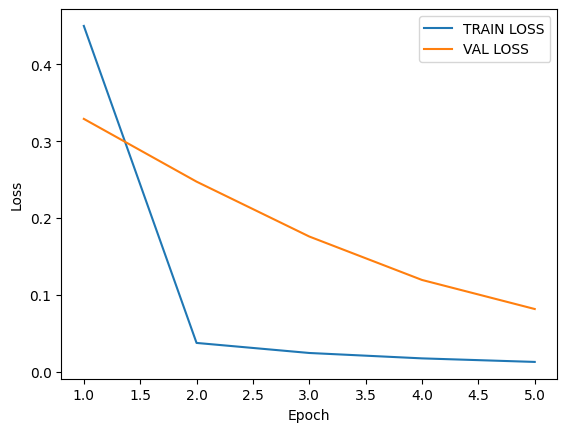

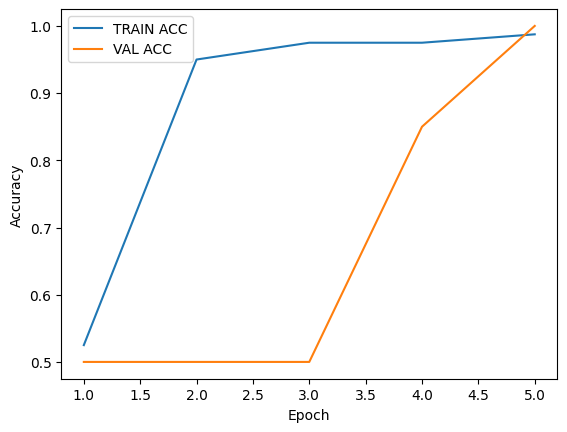

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
val   = pd.read_csv("val.csv")

X_train = train[["X0","X1","X2","X3","X4"]].values.astype(float)
y_train = train["TARGET"].values.astype(float)
X_val   = val[["X0","X1","X2","X3","X4"]].values.astype(float)
y_val   = val["TARGET"].values.astype(float)

# inisialisasi bobot bias
W = np.array([0.5, 0.5, 0.5, 0.5, 0.5], dtype=float)
lr = 0.1
epochs = 5

# fungsi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# fungsi dot product
def dot(X, W):
    return np.dot(X, W)

# fungsi error SSE
def SSE_error(p, y):
    return (p - y) ** 2

# fungsi update bobot bias
def update_bobot(W, x, y, lr):
    p = sigmoid(dot(x, W))
    grad = 2 * (p - y) * p * (1 - p) * x
    return W - lr * grad, p

train_loss, val_loss, train_acc, val_acc = [], [], [], []

for epoch in range(1, epochs+1):
    sse_list, preds = [], []
    for i in range(len(X_train)):
        W, p = update_bobot(W, X_train[i], y_train[i], lr)
        pred = 1 if p >= 0.5 else 0
        sse = SSE_error(p, y_train[i])
        sse_list.append(sse)
        preds.append(pred)

    loss_train = np.mean(sse_list)
    acc_train = np.mean(np.array(preds) == y_train)

    p_val = sigmoid(dot(X_val, W))
    loss_val = np.mean(SSE_error(p_val, y_val))
    acc_val = np.mean((p_val >= 0.5).astype(int) == y_val)

    train_loss.append(loss_train)
    val_loss.append(loss_val)
    train_acc.append(acc_train)
    val_acc.append(acc_val)

    print(f"Epoch {epoch} | Train Loss={loss_train:.4f} Acc={acc_train:.4f} | "
          f"Val Loss={loss_val:.4f} Acc={acc_val:.4f}")

# plot loss
plt.plot(range(1, epochs+1), train_loss, label="TRAIN LOSS")
plt.plot(range(1, epochs+1), val_loss, label="VAL LOSS")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

# plot acc
plt.plot(range(1, epochs+1), train_acc, label="TRAIN ACC")
plt.plot(range(1, epochs+1), val_acc, label="VAL ACC")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.show()